In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 

In [6]:
df = pd.read_csv('cars.csv')
df

,Car_ID,Brand,Model,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,1,Toyota,Corolla,2018,50000,Petrol,Manual,First,15,1498,108,5,800000
1,2,Honda,Civic,2019,40000,Petrol,Automatic,Second,17,1597,140,5,1000000
2,3,Ford,Mustang,2017,20000,Petrol,Automatic,First,10,4951,395,4,2500000
3,4,Maruti,Swift,2020,30000,Diesel,Manual,Third,23,1248,74,5,600000
4,5,Hyundai,Sonata,2016,60000,Diesel,Automatic,Second,18,1999,194,5,850000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,Mercedes,C-Class,2019,22000,Diesel,Automatic,First,16,1950,191,5,2900000
96,97,Toyota,Innova Crysta,2017,38000,Diesel,Manual,Second,13,2755,171,7,1400000
97,98,Ford,EcoSport,2018,26000,Petrol,Manual,Third,18,1497,121,5,750000
98,99,Hyundai,Verna,2019,24000,Petrol,Automatic,Second,17,1497,113,5,850000


In [7]:
df.head()

,Car_ID,Brand,Model,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,1,Toyota,Corolla,2018,50000,Petrol,Manual,First,15,1498,108,5,800000
1,2,Honda,Civic,2019,40000,Petrol,Automatic,Second,17,1597,140,5,1000000
2,3,Ford,Mustang,2017,20000,Petrol,Automatic,First,10,4951,395,4,2500000
3,4,Maruti,Swift,2020,30000,Diesel,Manual,Third,23,1248,74,5,600000
4,5,Hyundai,Sonata,2016,60000,Diesel,Automatic,Second,18,1999,194,5,850000


In [8]:
df.set_index('Car_ID', inplace = True)

C:\Users\NEW OM\AppData\Local\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


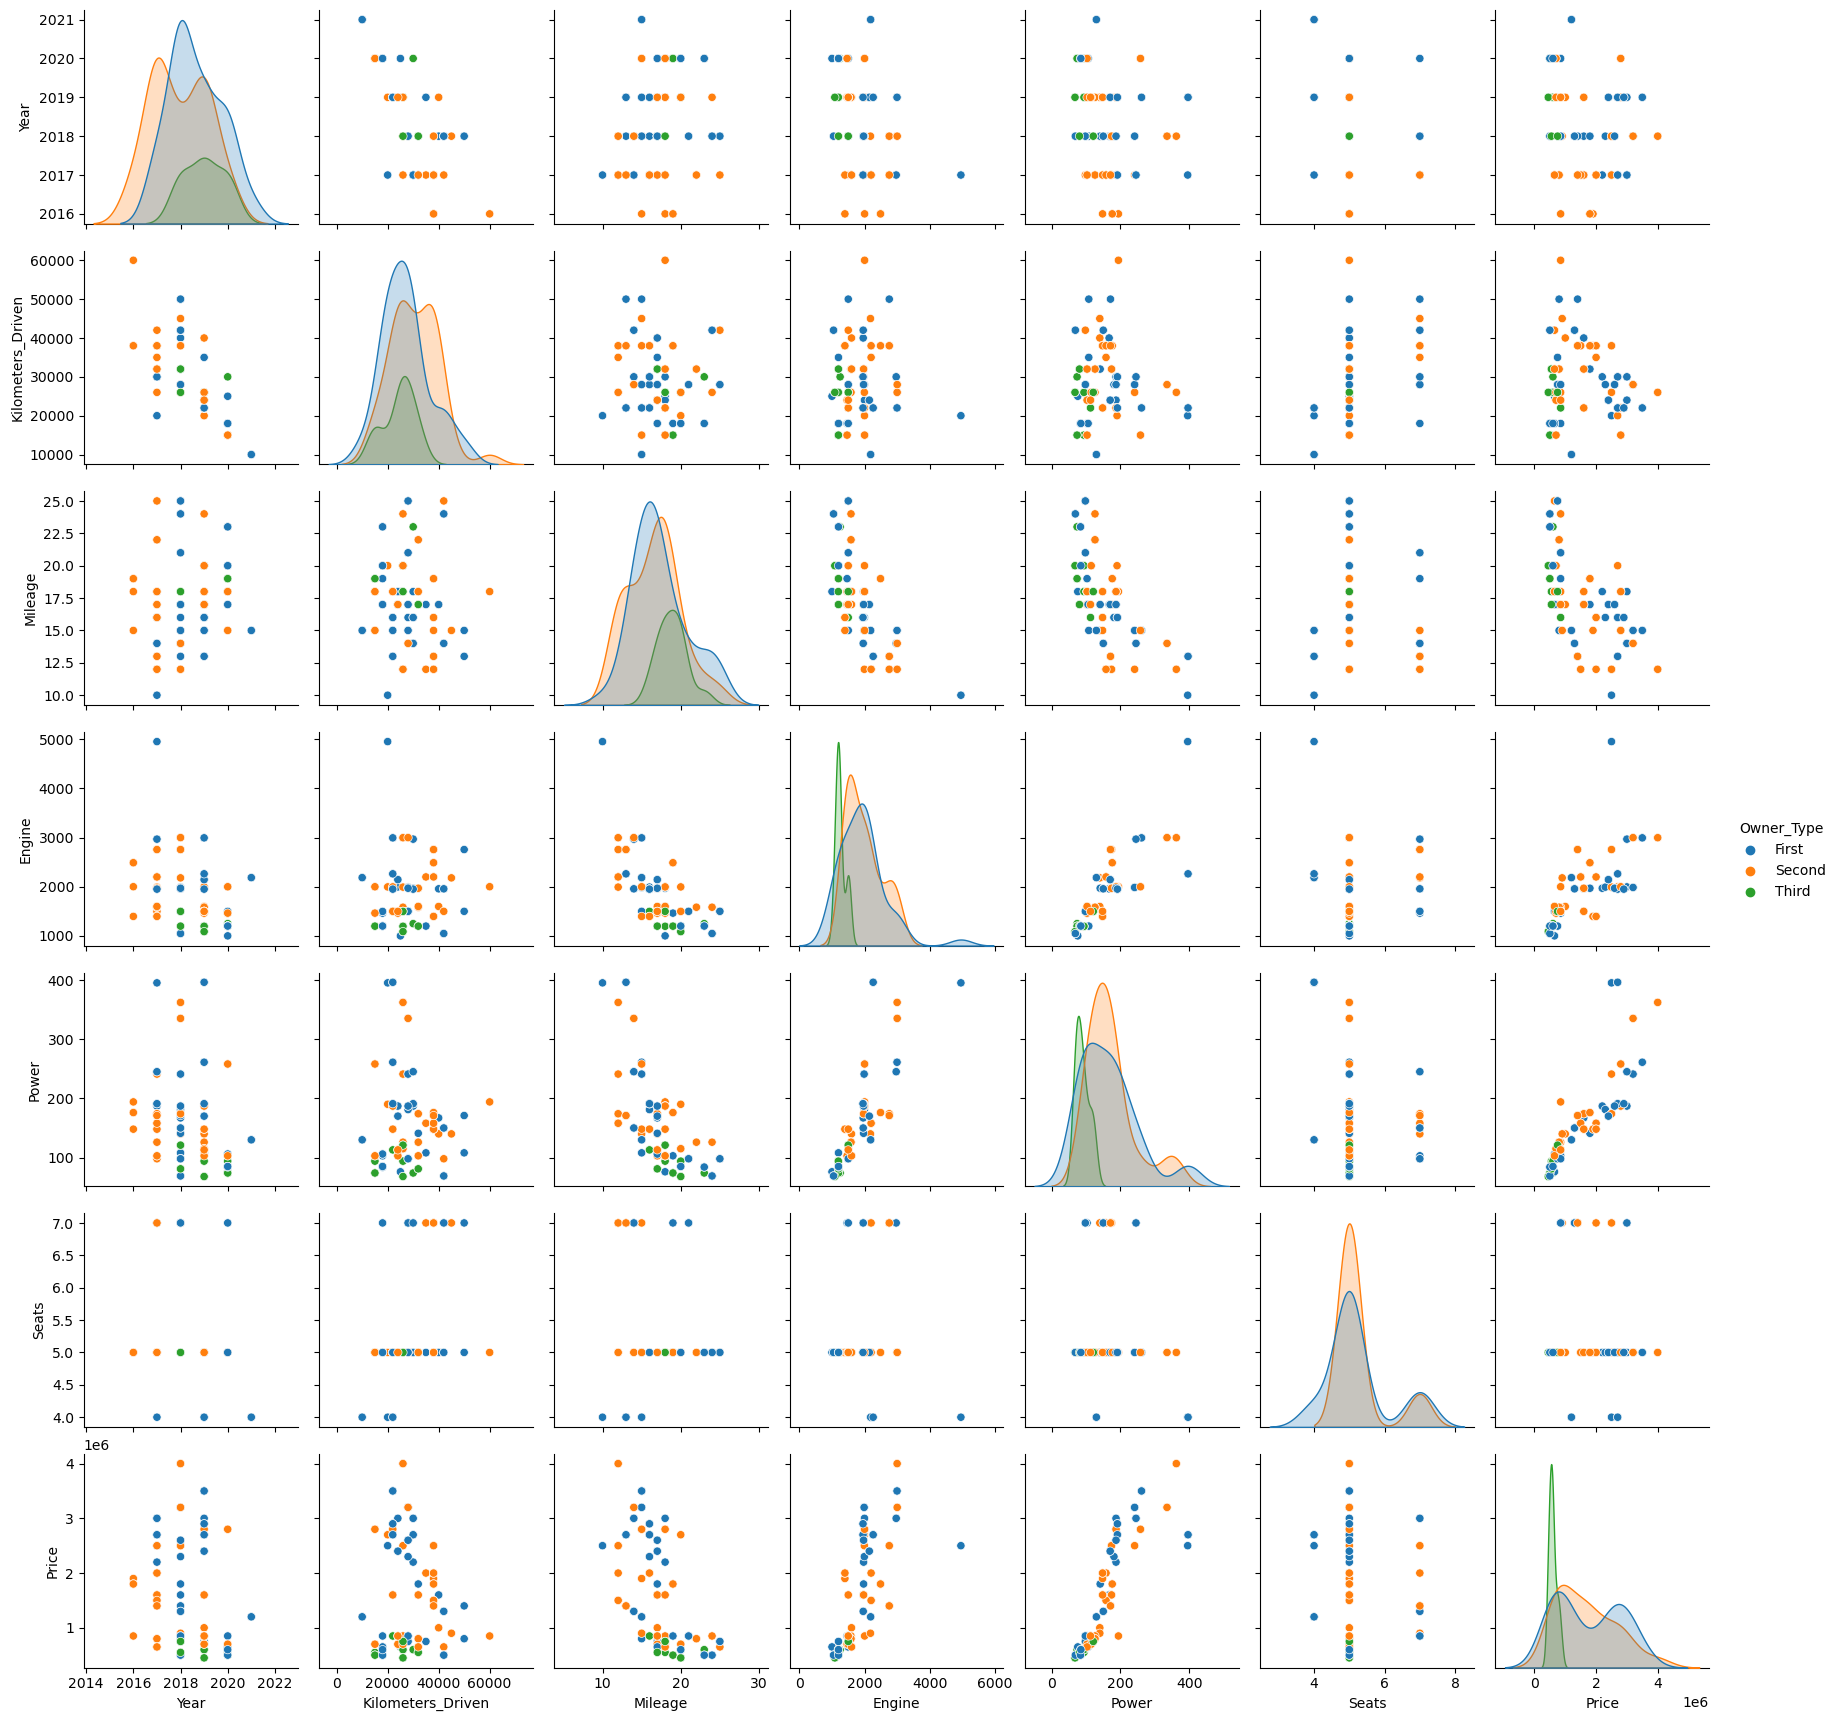

In [9]:
sns.pairplot(df,  hue="Owner_Type")

In [10]:
##Year have no effect, but in reality, we know that Year do matters, 
##So, in the dataset, we will convert our Year into Age of the car by reducing it from the current year

Feature Selection

In [11]:
df['Car_Age'] = 2024 - df.Year
df = df.drop(columns=['Year', 'Seats'])

df.head()

,Brand,Model,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Price,Car_Age
Car_ID,,,,,,,,,,,
1,Toyota,Corolla,50000,Petrol,Manual,First,15,1498,108,800000,6
2,Honda,Civic,40000,Petrol,Automatic,Second,17,1597,140,1000000,5
3,Ford,Mustang,20000,Petrol,Automatic,First,10,4951,395,2500000,7
4,Maruti,Swift,30000,Diesel,Manual,Third,23,1248,74,600000,4
5,Hyundai,Sonata,60000,Diesel,Automatic,Second,18,1999,194,850000,8


In [12]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for i in df.select_dtypes('object').columns:
    df[i] = le.fit_transform(df[i])

df.head()

,Brand,Model,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Price,Car_Age
Car_ID,,,,,,,,,,,
1,9,15,50000,1,1,0,15,1498,108,800000,6
2,3,14,40000,1,0,1,17,1597,140,1000000,5
3,2,30,20000,1,0,0,10,4951,395,2500000,7
4,6,42,30000,0,1,2,23,1248,74,600000,4
5,4,41,60000,0,0,1,18,1999,194,850000,8


In [13]:
cols = df.columns.tolist()

cols[-1], cols[-2] = cols[-2], cols[-1]

df = df[cols]

df.head()

,Brand,Model,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Car_Age,Price
Car_ID,,,,,,,,,,,
1,9,15,50000,1,1,0,15,1498,108,6,800000
2,3,14,40000,1,0,1,17,1597,140,5,1000000
3,2,30,20000,1,0,0,10,4951,395,7,2500000
4,6,42,30000,0,1,2,23,1248,74,4,600000
5,4,41,60000,0,0,1,18,1999,194,8,850000


In [14]:
df.corr()

,Brand,Model,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Car_Age,Price
Brand,1.000000,0.194702,0.082947,0.063037,0.187123,-0.079183,0.086441,-0.166709,-0.335425,-0.110875,-0.354543
Model,0.194702,1.000000,0.011237,-0.059048,0.263721,0.088050,0.130721,-0.074587,-0.153203,-0.090754,-0.292434
Kilometers_Driven,0.082947,0.011237,1.000000,-0.323762,0.030157,-0.000560,-0.104437,0.112340,-0.026732,0.741176,-0.051104
Fuel_Type,0.063037,-0.059048,-0.323762,1.000000,0.066306,0.323325,-0.060292,-0.258043,-0.008562,-0.252843,-0.180964
Transmission,0.187123,0.263721,0.030157,0.066306,1.000000,0.097708,0.331015,-0.421374,-0.574349,-0.211993,-0.676484
Owner_Type,-0.079183,0.088050,-0.000560,0.323325,0.097708,1.000000,0.072823,-0.248205,-0.237857,0.036276,-0.301488
Mileage,0.086441,0.130721,-0.104437,-0.060292,0.331015,0.072823,1.000000,-0.680949,-0.648894,-0.213177,-0.595252
Engine,-0.166709,-0.074587,0.112340,-0.258043,-0.421374,-0.248205,-0.680949,1.000000,0.805709,0.355122,0.714465
Power,-0.335425,-0.153203,-0.026732,-0.008562,-0.574349,-0.237857,-0.648894,0.805709,1.000000,0.249446,0.856620
Car_Age,-0.110875,-0.090754,0.741176,-0.252843,-0.211993,0.036276,-0.213177,0.355122,0.249446,1.000000,0.232687


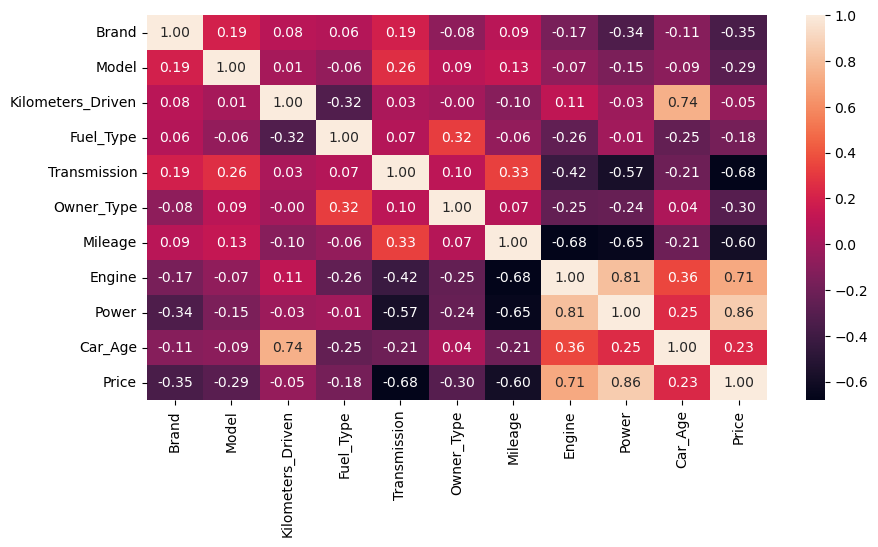

In [15]:
plt.figure(figsize=(10, 5))

sns.heatmap(df.corr(), annot=True, fmt='.2f', cmap='rocket', cbar=True)
plt.show()

In [16]:
X = df.drop(columns='Price')
y = df['Price']

In [17]:
from sklearn.preprocessing import StandardScaler

std_scale = StandardScaler()

X_scaled = std_scale.fit_transform(X)

In [18]:
X = pd.DataFrame(X_scaled, columns = X.columns, index=X.index)

X.head()

,Brand,Model,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Car_Age
Car_ID,,,,,,,,,,
1,1.197594,-0.795891,2.407540,0.960769,1.151339,-1.002318,-0.671057,-0.568704,-0.654590,0.334681
2,-0.612372,-0.853690,1.305691,0.960769,-0.868554,0.450317,-0.063766,-0.411098,-0.236739,-0.523475
3,-0.914032,0.071093,-0.898007,0.960769,-0.868554,-1.002318,-2.189286,4.928417,3.093011,1.192836
4,0.292611,0.764680,0.203842,-1.040833,1.151339,1.902952,1.758109,-0.966700,-1.098556,-1.381631
5,-0.310711,0.706881,3.509389,-1.040833,-0.868554,0.450317,0.239880,0.228880,0.468385,2.050992


In [19]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import ElasticNet
from sklearn.metrics import r2_score, mean_squared_error


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=47)

In [20]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

# Let's define our pipeline

pipeline = Pipeline([
    ('poly', PolynomialFeatures()), 
    ('reg', ElasticNet())
])

In [21]:
## Define the paramter grid

param_grid = {
    'poly__degree': [1,2,3,4,5], 
    'reg__alpha': [0.1, 1.0, 10], 
    'reg__l1_ratio': [0.5, 0.7, 0.9], 
    'reg__max_iter': [100,1000,10000]
}

In [22]:
# Run grid Search

with warnings.catch_warnings():
    
    warnings.filterwarnings('ignore')
    grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring = 'neg_mean_squared_error')

    grid_search.fit(X_train, y_train)

In [23]:
print('Best parameters found: ', grid_search.best_params_)
print('Best Cross validation Score: ', -grid_search.best_score_)

Best parameters found:  {'poly__degree': 4, 'reg__alpha': 0.1, 'reg__l1_ratio': 0.9, 'reg__max_iter': 100}
Best Cross validation Score:  162126253476.0552


In [24]:
best_model = grid_search.best_estimator_

In [25]:
best_model.score(X_test, y_test)

0.9670936048959103

In [26]:
best_model.fit(X_train, y_train)

C:\Users\NEW OM\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.331e+11, tolerance: 7.941e+09
  model = cd_fast.enet_coordinate_descent(


Pipeline(steps=[('poly', PolynomialFeatures(degree=4)),
                ('reg', ElasticNet(alpha=0.1, l1_ratio=0.9, max_iter=100))])

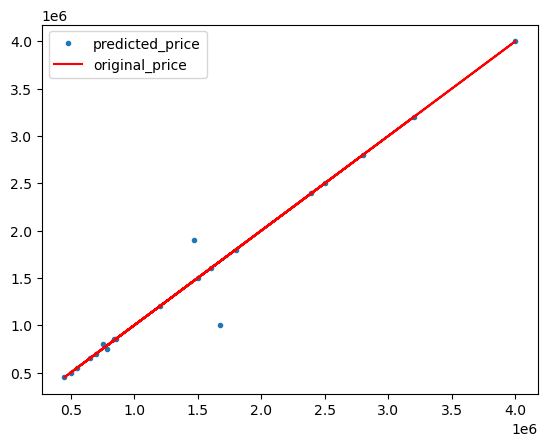

(<matplotlib.legend.Legend at 0x184e0ae23d0>, None)

In [27]:
y_test_pred = best_model.predict(X_test)

## Our variance of the predicted test data and original data

plt.plot(y_test_pred, y_test.values, '.', label='predicted_price')
plt.plot(y_test, y_test, 'r', label='original_price')
plt.legend(), plt.show()

In [28]:
new_df = pd.concat((y_test, (pd.DataFrame(y_test_pred, columns=['Predicted_Price'], index=y_test.index))), axis=1)

new_df['price_difference'] = new_df['Price'] - new_df['Predicted_Price']

new_df.style.format("{:.2f}")

,Price,Predicted_Price,price_difference
Car_ID,,,
18,1900000.00,1469731.74,430268.26
91,500000.00,500435.43,-435.43
95,2800000.00,2800005.88,-5.88
87,2400000.00,2394761.04,5238.96
64,1600000.00,1602074.71,-2074.71
6,750000.00,785553.78,-35553.78
39,4000000.00,3999793.04,206.96
15,850000.00,838143.24,11856.76
41,1500000.00,1499411.30,588.70


In [29]:
r2_score(y_test, y_test_pred)

0.9670936048959103